In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df1 = pd.read_json('beef_stew.json')
df2 = pd.read_json('fish_smoothie_meatballs_chicken.json')
df3 = pd.read_json('salad_pasta_steak.json')
# data transformations and pca, correlation
frames = [df1, df2, df3]
df = pd.concat(frames)

In [4]:
df

,search_term,name,rating,calories,servings,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Potassium,Total Sugars,Vitamin C,Calcium,Iron
0,beef%20stew,Greek-Style Beef Stew (Stifado),4.8,777,6,55.0,20.0,163.0,1519.0,20.0,2.0,42.0,1073.0,NaN,NaN,NaN,NaN
1,beef%20stew,Got No Beef Stew,5.0,408,4,15.0,5.0,15.0,2541.0,60.0,8.0,13.0,1765.0,NaN,NaN,NaN,NaN
2,beef%20stew,Hearty Spanish Beef Stew,5.0,305,4,18.0,5.0,67.0,742.0,12.0,2.0,23.0,524.0,5.0,49.0,74.0,6.0
3,beef%20stew,Rutabaga Beef Stew,4.5,462,4,31.0,10.0,82.0,444.0,20.0,4.0,25.0,990.0,NaN,NaN,NaN,NaN
4,beef%20stew,Jacquie's Slow Cooker Beef Stew with Sweet Pot...,NaN,336,10,14.0,5.0,50.0,433.0,32.0,5.0,18.0,776.0,7.0,7.0,74.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,steak,Yummy Pineapple Beef Steak Marinade,4.3,71,14,5.0,1.0,NaN,144.0,6.0,NaN,NaN,135.0,5.0,3.0,19.0,1.0
1477,steak,My Country Style Steak,4.5,254,4,13.0,3.0,27.0,732.0,18.0,1.0,16.0,214.0,0.0,1.0,20.0,2.0
1478,steak,Deep Fried Pork Steak,4.5,349,12,14.0,3.0,104.0,1592.0,19.0,1.0,35.0,612.0,0.0,1.0,50.0,3.0
1479,steak,Steak and Ale Pie with Mushrooms,4.3,473,8,29.0,9.0,48.0,320.0,32.0,3.0,18.0,525.0,3.0,10.0,27.0,3.0


In [51]:
df_kaggle = pd.read_csv('archive/recipes.csv')
df_kaggle_reviews = pd.read_csv('archive/reviews.csv')

In [50]:
df_kaggle = df_kaggle.drop(columns=['AuthorId', 'AuthorName', 'Images', 'RecipeInstructions'])
df_kaggle

,RecipeId,Name,CookTime,PrepTime,TotalTime,DatePublished,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")",...,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN
1,39,Biryani,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...",...,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN
2,40,Best Lemonade,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")",...,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...",...,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs
4,42,Cabbage Soup,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")",...,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,Dessert,"""< 4 Hours""","c(""3"", ""1/2"", ""1/2"", ""1/4"", ""1/4"", ""1"", ""1/4"",...",...,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...",Very Low Carbs,"c(""High Protein"", ""High In..."", ""< 4 Hours"")","c(""9"", ""2"", ""4"", ""2"", ""1/3"", ""3 1/2"", ""1/3"")",...,172.4,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast
522514,541381,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,Ice Cream,"c(""Dessert"", ""< 4 Hours"")","c(""3"", ""3"", ""1/2"", ""1/2"", ""2"", ""2"")",...,117.2,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...",Canadian,"c(""< 15 Mins"", ""Easy"")","c(""4"", ""1/4"", ""1"", ""1/2"", ""8 1/2"", ""40"")",...,0.6,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls


In [22]:
# Fix dtype of some columns
df["calories"] = pd.to_numeric(df["calories"])
df["servings"] = pd.to_numeric(df["servings"])
df.dtypes

search_term            object
name                   object
rating                float64
calories              float64
servings              float64
Total Fat             float64
Saturated Fat         float64
Cholesterol           float64
Sodium                float64
Total Carbohydrate    float64
Dietary Fiber         float64
Protein               float64
Potassium             float64
Total Sugars          float64
Vitamin C             float64
Calcium               float64
Iron                  float64
dtype: object

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

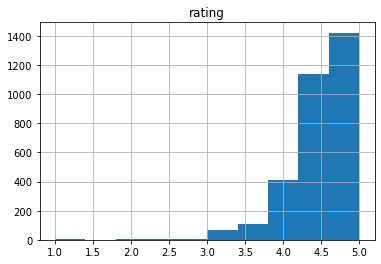

In [23]:
# df.dropna(subset=['rating'])
df.hist(column='rating')

array([[<AxesSubplot:title={'center':'Calories'}>]], dtype=object)

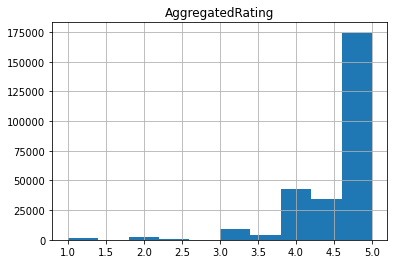

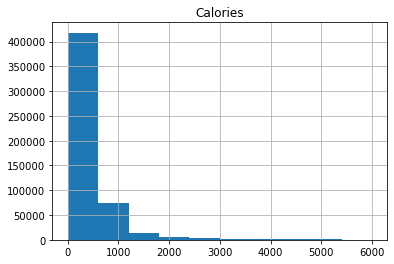

In [62]:
df_kaggle.hist(column='AggregatedRating')

df_kaggle = df_kaggle[df_kaggle['Calories'] < 6000]
df_kaggle.hist(column='Calories')

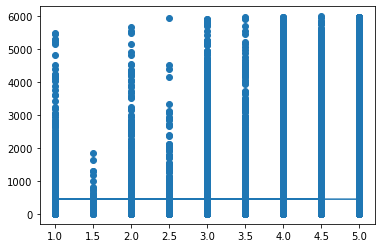

In [64]:
df1 = df_kaggle.dropna(subset=['AggregatedRating', 'Calories'])

m, b = np.polyfit(df1.AggregatedRating, df1.Calories, 1) 
plt.plot(df1.AggregatedRating, m*df1.AggregatedRating+b)

plt.scatter(df1.AggregatedRating, df1.Calories)

array([[<AxesSubplot:title={'center':'servings'}>]], dtype=object)

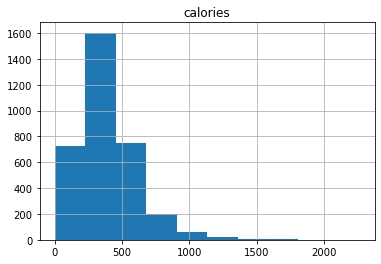

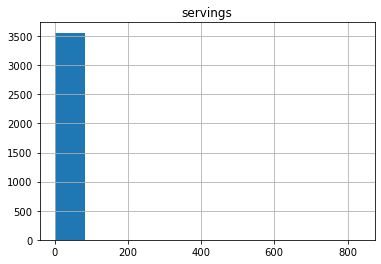

In [59]:
df.hist(column='calories')
df.hist(column='servings')

In [29]:
df.loc[df['servings'].idxmax()]

,search_term,name,rating,calories,servings,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Potassium,Total Sugars,Vitamin C,Calcium,Iron
424,fish,Jamaican Jerk Dry Rub,4.5,10.0,832.0,0.0,NaN,NaN,1.0,2.0,1.0,0.0,26.0,1.0,1.0,8.0,0.0
424,salad,Black Bean and Cucumber Salad,4.4,274.0,4.0,11.0,2.0,NaN,419.0,39.0,9.0,9.0,633.0,9.0,18.0,61.0,3.0


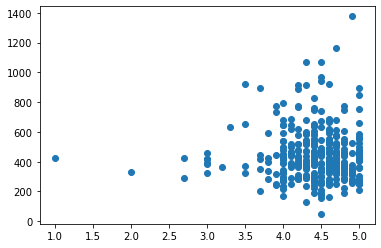

In [5]:
df1 = df.dropna(subset=['rating', 'calories'])
df1 = df1.loc[df1['search_term'] == 'beef%20stew']
#m, b = np.polyfit(df1.rating, df1.calories, 1) 
#plt.plot(df1.rating, m*df1.rating+b)

plt.scatter(df1.rating, df1.calories)

<AxesSubplot:>

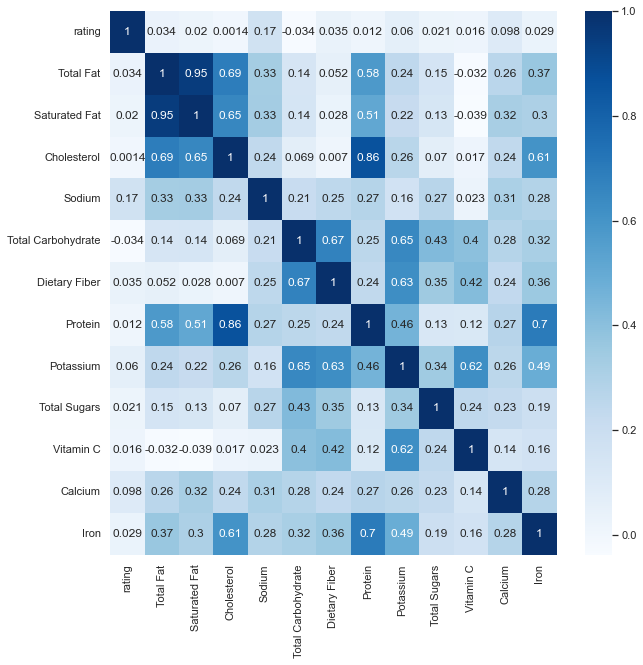

In [19]:
df1 = df.loc[df['search_term'] == 'beef%20stew']
corr = df1.corr()
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(corr, cmap="Blues", annot=True)

In [48]:
from sklearn.preprocessing import StandardScaler

#features = ['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Protein', 'Potassium', 'Total Sugars', 'Vitamin C']
features = ['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Protein', 'Total Sugars']

df1 = df.dropna(subset=features)
df1 = df1.loc[df1['search_term'] == 'beef%20stew']
print(df1)

x = df1.loc[:, features].values
y = df1.loc[:,['rating']].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1'])

df1 = df1.reset_index()
finalDf = pd.concat([principalDf, df1[['rating']]], axis=1)

     search_term                                               name  rating  \
2    beef%20stew                           Hearty Spanish Beef Stew     5.0   
4    beef%20stew  Jacquie's Slow Cooker Beef Stew with Sweet Pot...     NaN   
5    beef%20stew                         Savory Vegetable Beef Stew     4.7   
6    beef%20stew                Instant Pot Beef Stew with Red Wine     4.0   
7    beef%20stew                                  Beer Beef Stew II     3.7   
..           ...                                                ...     ...   
362  beef%20stew                                     Cabbage Borsht     4.2   
363  beef%20stew         Smoked Paprika Goulash for the Slow Cooker     4.1   
364  beef%20stew                                  Bistec Encebollao     4.6   
365  beef%20stew                                Brazilian Picadillo     4.4   
366  beef%20stew                                      Santa Fe Soup     4.4   

    calories servings  Total Fat  Saturated Fat  Ch

<AxesSubplot:>

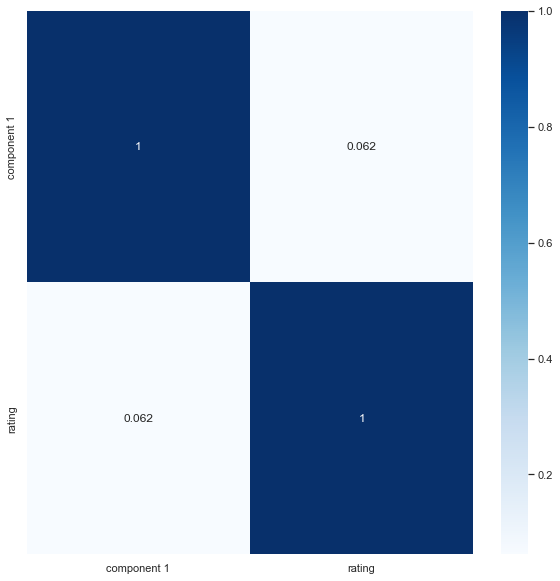

In [47]:
#df1 = df.loc[df['search_term'] == 'beef%20stew']
corr = finalDf.corr()
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(corr, cmap="Blues", annot=True)